In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
data=pd.read_csv('IPL Matches 2008-2020.csv')

### Reason To Take this Dataset

->Firstly I'm huge fan of Cricket and when it comes IPL it is most interesting and Entertaining Tournament.
->Through this Dataset i want to conclude that the teams which are winning,after my analysis i want to come to a
  strategy that what we should with respect to toss win,toss decision,venue/hometown and result through overall analysis of IPL history.


### Viewing Top 5 Rows of the dataset

In [71]:
data.head()

id        city        date player_of_match  \
0  335982   Bangalore  2008-04-18     BB McCullum   
1  335983  Chandigarh  2008-04-19      MEK Hussey   
2  335984       Delhi  2008-04-19     MF Maharoof   
3  335985      Mumbai  2008-04-20      MV Boucher   
4  335986     Kolkata  2008-04-20       DJ Hussey   

                                        venue  neutral_venue  \
0                       M Chinnaswamy Stadium              0   
1  Punjab Cricket Association Stadium, Mohali              0   
2                            Feroz Shah Kotla              0   
3                            Wankhede Stadium              0   
4                                Eden Gardens              0   

                         team1                        team2  \
0  Royal Challengers Bangalore        Kolkata Knight Riders   
1              Kings XI Punjab          Chennai Super Kings   
2             Delhi Daredevils             Rajasthan Royals   
3               Mumbai Indians  Royal Challengers Bangalore   
4        Kolkata Knight Riders              Deccan Chargers   

                   toss_winner toss_decision                       winner  \
0  Royal Challengers Bangalore         field        Kolkata Knight Riders   
1          Chennai Super Kings           bat          Chennai Super Kings   
2             Rajasthan Royals           bat             Delhi Daredevils   
3               Mumbai Indians           bat  Royal Challengers Bangalore   
4              Deccan Chargers           bat        Kolkata Knight Riders   

    result  result_margin eliminator method    umpire1         umpire2  
0     runs          140.0          N    NaN  Asad Rauf     RE Koertzen  
1     runs           33.0          N    NaN  MR Benson      SL Shastri  
2  wickets            9.0          N    NaN  Aleem Dar  GA Pratapkumar  
3  wickets            5.0          N    NaN   SJ Davis       DJ Harper  
4  wickets            5.0          N    NaN  BF Bowden     K Hariharan

### INFORMATION OF THE FILE

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             816 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  816 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           816 non-null    object 
 11  result           816 non-null    object 
 12  result_margin    816 non-null    float64
 13  eliminator       816 non-null    object 
 14  umpire1          816 non-null    object 
 15  umpire2          816 non-null    object 
dtypes: float64(1), int64(2), object(13)
memory usage: 102.1+ KB


### Description the file

In [73]:
data.describe()

id  neutral_venue  result_margin
count  8.160000e+02     816.000000     799.000000
mean   7.563496e+05       0.094363      17.321652
std    3.058943e+05       0.292512      22.068427
min    3.359820e+05       0.000000       1.000000
25%    5.012278e+05       0.000000       6.000000
50%    7.292980e+05       0.000000       8.000000
75%    1.082626e+06       0.000000      19.500000
max    1.237181e+06       1.000000     146.000000

### Viewing NaN values

In [74]:
data.isna().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

### Filling all NaN Values and Deleting unwanted column

In [75]:
data=data.drop('method',axis=1)

In [76]:
data=data.fillna(method='bfill')

In [77]:
data.isna().sum()

id                 0
city               0
date               0
player_of_match    0
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
eliminator         0
umpire1            0
umpire2            0
dtype: int64

### CREATING A TEAM COLUMN WHICH IS NOT IN THE GIVEN DATA SET

In [102]:
data['teams']=(data['team1']+"&"+data['team2'])

In [103]:
data.head()

id        city        date player_of_match  \
0  335982   Bangalore  2008-04-18     BB McCullum   
1  335983  Chandigarh  2008-04-19      MEK Hussey   
2  335984       Delhi  2008-04-19     MF Maharoof   
3  335985      Mumbai  2008-04-20      MV Boucher   
4  335986     Kolkata  2008-04-20       DJ Hussey   

                                        venue  neutral_venue  \
0                       M Chinnaswamy Stadium              0   
1  Punjab Cricket Association Stadium, Mohali              0   
2                            Feroz Shah Kotla              0   
3                            Wankhede Stadium              0   
4                                Eden Gardens              0   

                         team1                        team2  \
0  Royal Challengers Bangalore        Kolkata Knight Riders   
1              Kings XI Punjab          Chennai Super Kings   
2             Delhi Daredevils             Rajasthan Royals   
3               Mumbai Indians  Royal Challengers Bangalore   
4        Kolkata Knight Riders              Deccan Chargers   

                   toss_winner toss_decision                       winner  \
0  Royal Challengers Bangalore         field        Kolkata Knight Riders   
1          Chennai Super Kings           bat          Chennai Super Kings   
2             Rajasthan Royals           bat             Delhi Daredevils   
3               Mumbai Indians           bat  Royal Challengers Bangalore   
4              Deccan Chargers           bat        Kolkata Knight Riders   

    result  result_margin eliminator    umpire1         umpire2  \
0     runs          140.0          N  Asad Rauf     RE Koertzen   
1     runs           33.0          N  MR Benson      SL Shastri   
2  wickets            9.0          N  Aleem Dar  GA Pratapkumar   
3  wickets            5.0          N   SJ Davis       DJ Harper   
4  wickets            5.0          N  BF Bowden     K Hariharan   

                                               teams  
0  Royal Challengers Bangalore&Kolkata Knight Riders  
1                Kings XI Punjab&Chennai Super Kings  
2                  Delhi Daredevils&Rajasthan Royals  
3         Mumbai Indians&Royal Challengers Bangalore  
4              Kolkata Knight Riders&Deccan Chargers

### Heres the most common players who got player of th match

In [79]:
data['player_of_match'].value_counts()

AB de Villiers    23
CH Gayle          23
RG Sharma         18
MS Dhoni          18
DA Warner         17
                  ..
SB Jakati          1
KK Ahmed           1
Z Khan             1
S Anirudha         1
CL White           1
Name: player_of_match, Length: 233, dtype: int64

### THE PLAYER WHO GOT PLAYER OF TH MATCH MAXIMUM TIMES

In [80]:
data['player_of_match'].value_counts().idxmax()

'AB de Villiers'

### THE PLAYER WHO GOT PLAYER OF TH MATCH LEAST TIMES

In [81]:
data['player_of_match'].value_counts().idxmin()

'J Theron'

### REPRESENTATION OF TOP 10 PLAYERS WHO GOT PLAYER OF THE MATCH

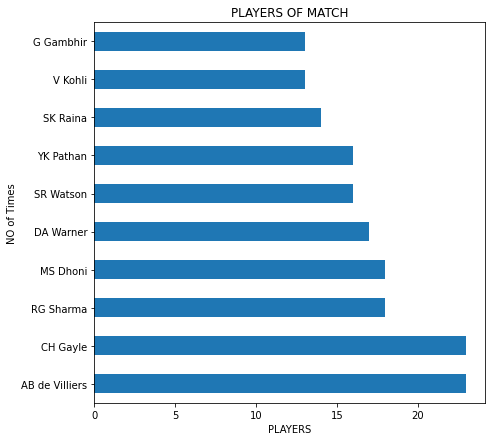

In [104]:
plt.figure(figsize=(7,7))
data['player_of_match'].value_counts().nlargest(10).plot(kind='barh')
plt.title("PLAYERS OF MATCH")
plt.ylabel("NO of Times")
plt.xlabel("PLAYERS")

plt.show()

### MOST COMMON TEAMS WHO GOT WINNED

In [88]:
data['winner'].value_counts()

Mumbai Indians                 121
Chennai Super Kings            108
Kolkata Knight Riders           99
Royal Challengers Bangalore     92
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

### THE MATCHES WHICH ARE TIED

In [112]:
data[data['result']=='tie']

id       city        date player_of_match  \
66    392190  Cape Town  2009-04-23       YK Pathan   
130   419121    Chennai  2010-03-21        J Theron   
328   598004  Hyderabad  2013-04-07       GH Vihari   
341   598017  Bangalore  2013-04-16         V Kohli   
416   729315  Abu Dhabi  2014-04-29     JP Faulkner   
476   829741  Ahmedabad  2015-04-21        SE Marsh   
610  1082625     Rajkot  2017-04-29       KH Pandya   
705  1175365      Delhi  2019-03-30         PP Shaw   
746  1178426     Mumbai  2019-05-02       JJ Bumrah   
757  1216493      Dubai  2020-09-20      MP Stoinis   
776  1216512  Abu Dhabi  2020-10-18     LH Ferguson   
781  1216517      Dubai  2020-10-18        KL Rahul   
811  1216547      Dubai  2020-09-28  AB de Villiers   

                                         venue  neutral_venue  \
66                                    Newlands              1   
130            MA Chidambaram Stadium, Chepauk              0   
328  Rajiv Gandhi International Stadium, Uppal              0   
341                      M Chinnaswamy Stadium              0   
416                       Sheikh Zayed Stadium              1   
476               Sardar Patel Stadium, Motera              0   
610     Saurashtra Cricket Association Stadium              0   
705                           Feroz Shah Kotla              0   
746                           Wankhede Stadium              0   
757        Dubai International Cricket Stadium              0   
776                       Sheikh Zayed Stadium              0   
781        Dubai International Cricket Stadium              0   
811        Dubai International Cricket Stadium              0   

                           team1                        team2  \
66         Kolkata Knight Riders             Rajasthan Royals   
130          Chennai Super Kings              Kings XI Punjab   
328          Sunrisers Hyderabad  Royal Challengers Bangalore   
341  Royal Challengers Bangalore             Delhi Daredevils   
416        Kolkata Knight Riders             Rajasthan Royals   
476             Rajasthan Royals              Kings XI Punjab   
610                Gujarat Lions               Mumbai Indians   
705               Delhi Capitals        Kolkata Knight Riders   
746               Mumbai Indians          Sunrisers Hyderabad   
757               Delhi Capitals              Kings XI Punjab   
776        Kolkata Knight Riders          Sunrisers Hyderabad   
781               Mumbai Indians              Kings XI Punjab   
811  Royal Challengers Bangalore               Mumbai Indians   

                     toss_winner toss_decision                       winner  \
66         Kolkata Knight Riders         field             Rajasthan Royals   
130          Chennai Super Kings         field              Kings XI Punjab   
328  Royal Challengers Bangalore           bat          Sunrisers Hyderabad   
341  Royal Challengers Bangalore         field  Royal Challengers Bangalore   
416             Rajasthan Royals           bat             Rajasthan Royals   
476              Kings XI Punjab         field              Kings XI Punjab   
610                Gujarat Lions           bat               Mumbai Indians   
705               Delhi Capitals         field               Delhi Capitals   
746               Mumbai Indians           bat               Mumbai Indians   
757              Kings XI Punjab         field               Delhi Capitals   
776          Sunrisers Hyderabad         field        Kolkata Knight Riders   
781               Mumbai Indians           bat              Kings XI Punjab   
811               Mumbai Indians         field  Royal Challengers Bangalore   

    result  result_margin eliminator       umpire1       umpire2  \
66     tie            7.0          Y     MR Benson     M Erasmus   
130    tie            7.0          Y   K Hariharan     DJ Harper   
328    tie           19.0          Y  AK Chaudhary        S Ravi   
341    tie           11.0          Y  

### REPRESENTATION OF WINNING TEAMS IN PIE PLOT

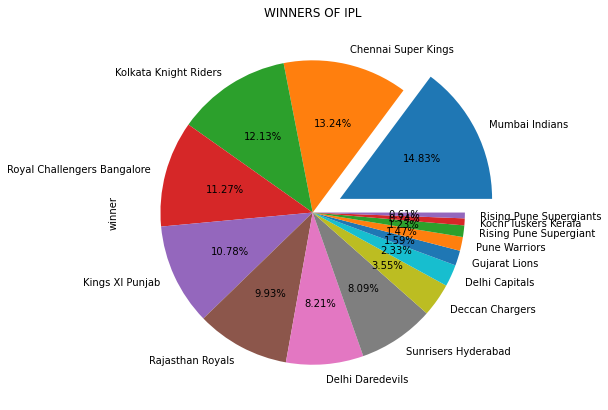

In [125]:
plt.figure(figsize=(7,7))
data['winner'].value_counts().plot.pie(autopct="%1.2f%%",explode=(0.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0))
plt.title("WINNERS OF IPL")

plt.show()

### MOST TIMES WINNING TEAM IN THE HISTORY OF THE IPL

In [126]:
data.groupby('winner')['teams'].value_counts().idxmax()[0]

'Mumbai Indians'

### LEAST TIMES WINNING TEAM IN THE HISTORY OF THE IPL

In [127]:
data.groupby('winner')['teams'].value_counts().idxmin()[0]

'Chennai Super Kings'

### TOP 3 WINNING TEAM IN THE HISTORY OF THE IPL AND ITS REPRESENTATION

In [128]:
data.winner.value_counts().nlargest(3)

Mumbai Indians           121
Chennai Super Kings      108
Kolkata Knight Riders     99
Name: winner, dtype: int64

<AxesSubplot:>

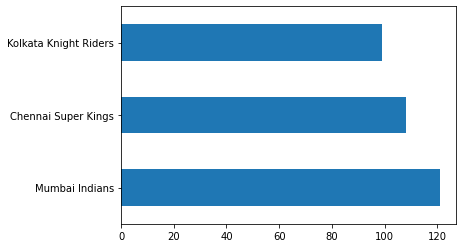

In [130]:
data.winner.value_counts().nlargest(3).plot(kind='barh')

### WINNER WITH RESPECT TO VENUE AND ITS REPRESENTATION ON PIE CHART

In [132]:
data.groupby('winner')['venue'].value_counts().nlargest(15)

winner                       venue                                               
Kolkata Knight Riders        Eden Gardens                                            45
Mumbai Indians               Wankhede Stadium                                        42
Chennai Super Kings          MA Chidambaram Stadium, Chepauk                         40
Rajasthan Royals             Sawai Mansingh Stadium                                  32
Sunrisers Hyderabad          Rajiv Gandhi International Stadium, Uppal               30
Royal Challengers Bangalore  M Chinnaswamy Stadium                                   29
Delhi Daredevils             Feroz Shah Kotla                                        27
Kings XI Punjab              Punjab Cricket Association Stadium, Mohali              18
                             Punjab Cricket Association IS Bindra Stadium, Mohali    12
Mumbai Indians               Eden Gardens                                            10
                             M Chinnas

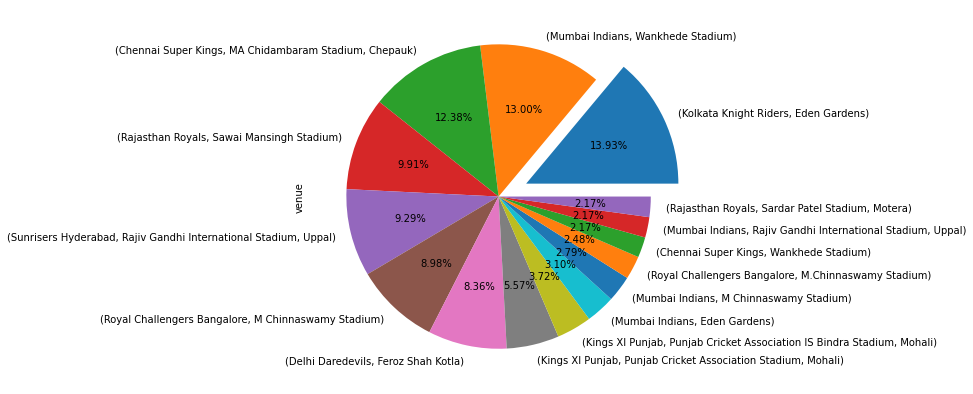

In [138]:
plt.figure(figsize=(7,7))
data.groupby('winner')['venue'].value_counts().nlargest(15).plot(kind='pie',explode=(0.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0),autopct=("%1.2f%%"))
plt.show()

### WINNERS AND ITS REPRESENTATION

In [136]:
data.winner

0            Kolkata Knight Riders
1              Chennai Super Kings
2                 Delhi Daredevils
3      Royal Challengers Bangalore
4            Kolkata Knight Riders
                  ...             
811    Royal Challengers Bangalore
812                 Mumbai Indians
813            Sunrisers Hyderabad
814                 Delhi Capitals
815                 Mumbai Indians
Name: winner, Length: 816, dtype: object

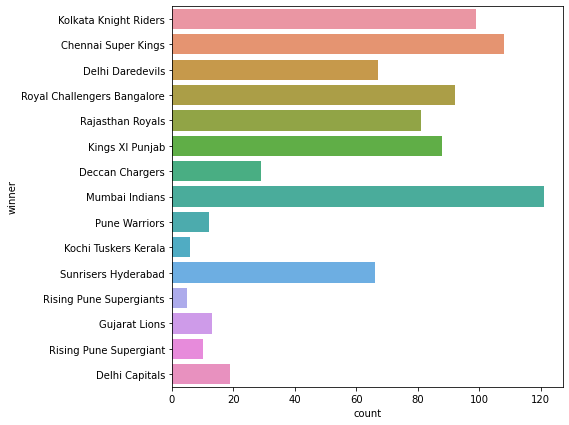

In [137]:
plt.figure(figsize=(7,7))         #chart give view of city with number of bikes
sns.countplot(data=data,y='winner')
plt.show()

### CORRELATION

In [139]:
corr=data.corr()
corr

id  neutral_venue  result_margin
id             1.000000      -0.292042       0.003656
neutral_venue -0.292042       1.000000      -0.010340
result_margin  0.003656      -0.010340       1.000000

### HEATMAP

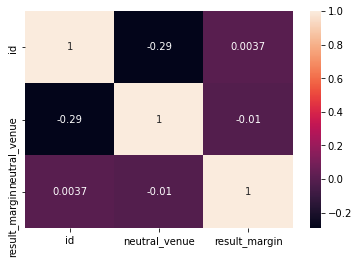

In [140]:
sns.heatmap(corr,annot=True)
plt.show()

#from above correlation we conclude that there is a -ve correlation between neutral_venue and resut_margin,i.e they are inversly proportional to each other
#+ve correlation between id and result_margin
#-ve correlation between id and neutral venue


### THESE ARE THE DIFFERENT VENUES OF THE MATCHES AND ITS REPRESENTATION 

In [144]:
data.venue.unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

[]

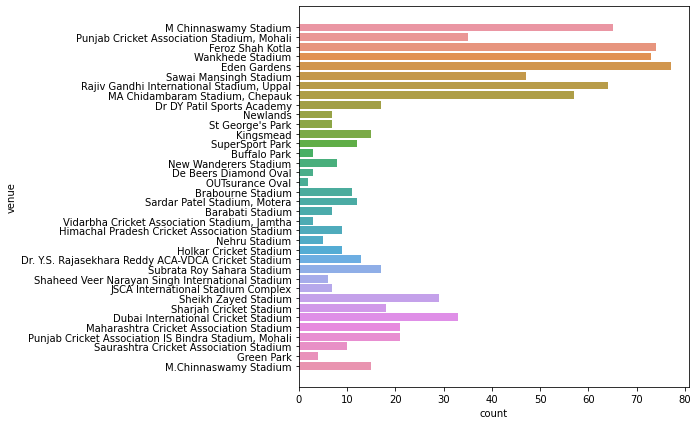

In [142]:
plt.figure(figsize=(7,7))
sns.countplot(data=data,y=data.venue)
plt.plot()

### WINNERS WHO WON THE MATCH WITH RESPECT TO TOSS

In [152]:
teams=data['toss_winner'].unique()
decision=pd.DataFrame([],columns=['Toss winner','Decision','Times'])
for element in teams:
    team_bat=data[(data['toss_winner']==element) & (data['toss_decision']=='bat')]
    team_field=data[(data['toss_winner']==element) & (data['toss_decision']=='field')]
    decision=decision.append({'Toss winner':element,'Decision':'bat','Times':team_bat['toss_decision'].count()},ignore_index=True)
    decision=decision.append({'Toss winner':element,'Decision':'field','Times':team_field['toss_decision'].count()},ignore_index=True)

In [153]:
decision

Toss winner Decision Times
0   Royal Challengers Bangalore      bat    24
1   Royal Challengers Bangalore    field    63
2           Chennai Super Kings      bat    51
3           Chennai Super Kings    field    46
4              Rajasthan Royals      bat    34
5              Rajasthan Royals    field    53
6                Mumbai Indians      bat    48
7                Mumbai Indians    field    58
8               Deccan Chargers      bat    24
9               Deccan Chargers    field    19
10              Kings XI Punjab      bat    27
11              Kings XI Punjab    field    58
12        Kolkata Knight Riders      bat    34
13        Kolkata Knight Riders    field    64
14             Delhi Daredevils      bat    29
15             Delhi Daredevils    field    51
16         Kochi Tuskers Kerala      bat     3
17         Kochi Tuskers Kerala    field     5
18                Pune Warriors      bat    11
19                Pune Warriors    field     9
20          Sunrisers Hyderabad      bat    24
21          Sunrisers Hyderabad    field    33
22                Gujarat Lions      bat     1
23                Gujarat Lions    field    14
24      Rising Pune Supergiants      bat     3
25      Rising Pune Supergiants    field     4
26       Rising Pune Supergiant      bat     0
27       Rising Pune Supergiant    field     6
28               Delhi Capitals      bat     7
29               Delhi Capitals    field    13

In [253]:
decision.groupby('Decision')['Times'].sum()

Decision
bat      320
field    496
Name: Times, dtype: int64

Text(0.5, 1.0, 'WINS WITH RESPECT TO TOSS CHOICE')

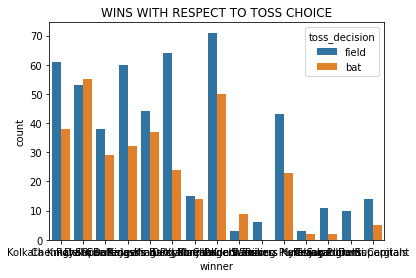

In [155]:
sns.countplot(data=data,x='winner',hue='toss_decision')
plt.title('WINS WITH RESPECT TO TOSS CHOICE')

WINNERS WITH RESPECT TO CITIES

In [170]:
data.groupby('winner')['city'].value_counts()

winner               city     
Chennai Super Kings  Chennai      40
                     Mumbai       11
                     Abu Dhabi     6
                     Delhi         6
                     Pune          6
                                  ..
Sunrisers Hyderabad  Jaipur        1
                     Kanpur        1
                     Pune          1
                     Raipur        1
                     Rajkot        1
Name: city, Length: 222, dtype: int64

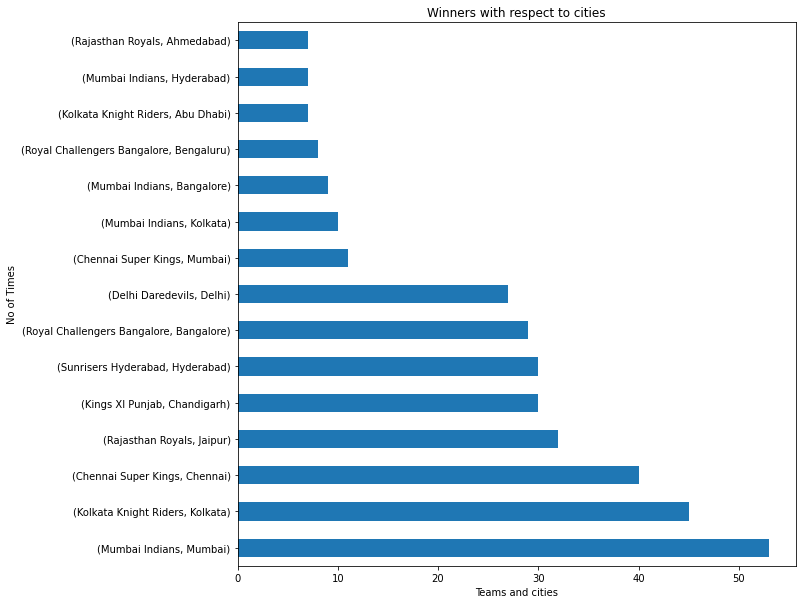

In [201]:
plt.figure(figsize=(10,10))
data.groupby('winner')['city'].value_counts().nlargest(15).plot(kind='barh')
plt.title('Winners with respect to cities')
plt.xlabel('Teams and cities')
plt.ylabel('No of Times')
plt.show()

### WINNERS WITH RESPECT TO RESULT MARHIN AND ITS REPRESENTATION IN PIE CHART

In [177]:
data.groupby('winner')['result_margin'].value_counts().nlargest(15)

winner                 result_margin
Kings XI Punjab        6.0              19
Mumbai Indians         5.0              16
Kolkata Knight Riders  7.0              14
Chennai Super Kings    5.0              13
Kings XI Punjab        7.0              13
Rajasthan Royals       7.0              12
Kolkata Knight Riders  6.0              11
                       8.0              11
Sunrisers Hyderabad    5.0              11
Chennai Super Kings    7.0              10
Delhi Daredevils       6.0              10
Kolkata Knight Riders  5.0              10
Mumbai Indians         6.0              10
                       8.0              10
                       9.0              10
Name: result_margin, dtype: int64

<AxesSubplot:ylabel='result_margin'>

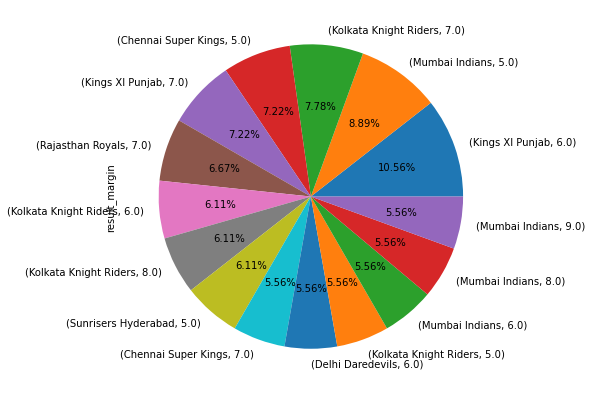

In [203]:
plt.figure(figsize=(7,7))
data.groupby('winner')['result_margin'].value_counts().nlargest(15).plot(kind='pie',autopct="%1.2f%%")

### TEAMS WON BY WICKETS/RUN/TIED

In [180]:
result=data['winner'].unique()
df=pd.DataFrame([],columns=['winner','result','times'])

In [181]:
for re in result:
    res_run=data[(data['winner']==re) & (data['result']=='runs')]
    res_wick=data[(data['winner']==re) & (data['result']=='wickets')]
    res_tie=data[(data['winner']==re) & (data['result']=='tie')]
    df=df.append({'winner':re,'result':'runs','times':res_run['winner'].count()},ignore_index=True)
    df=df.append({'winner':re,'result':'wickets','times':res_wick['winner'].count()},ignore_index=True)
    df=df.append({'winner':re,'result':'tie','times':res_tie['winner'].count()},ignore_index=True)

In [182]:
df

winner   result times
0         Kolkata Knight Riders     runs    41
1         Kolkata Knight Riders  wickets    57
2         Kolkata Knight Riders      tie     1
3           Chennai Super Kings     runs    55
4           Chennai Super Kings  wickets    53
5           Chennai Super Kings      tie     0
6              Delhi Daredevils     runs    25
7              Delhi Daredevils  wickets    42
8              Delhi Daredevils      tie     0
9   Royal Challengers Bangalore     runs    38
10  Royal Challengers Bangalore  wickets    52
11  Royal Challengers Bangalore      tie     2
12             Rajasthan Royals     runs    28
13             Rajasthan Royals  wickets    51
14             Rajasthan Royals      tie     2
15              Kings XI Punjab     runs    40
16              Kings XI Punjab  wickets    45
17              Kings XI Punjab      tie     3
18              Deccan Chargers     runs    18
19              Deccan Chargers  wickets    11
20              Deccan Chargers      tie     0
21               Mumbai Indians     runs    62
22               Mumbai Indians  wickets    57
23               Mumbai Indians      tie     2
24                Pune Warriors     runs     6
25                Pune Warriors  wickets     6
26                Pune Warriors      tie     0
27         Kochi Tuskers Kerala     runs     2
28         Kochi Tuskers Kerala  wickets     4
29         Kochi Tuskers Kerala      tie     0
30          Sunrisers Hyderabad     runs    34
31          Sunrisers Hyderabad  wickets    31
32          Sunrisers Hyderabad      tie     1
33      Rising Pune Supergiants     runs     2
34      Rising Pune Supergiants  wickets     3
35      Rising Pune Supergiants      tie     0
36                Gujarat Lions     runs     1
37                Gujarat Lions  wickets    12
38                Gujarat Lions      tie     0
39       Rising Pune Supergiant     runs     5
40       Rising Pune Supergiant  wickets     5
41       Rising Pune Supergiant      tie     0
42               Delhi Capitals     runs     9
43               Delhi Capitals  wickets     8
44               Delhi Capitals      tie     2

In [243]:
df.groupby('result')['times'].sum()

result
runs       366
tie         13
wickets    437
Name: times, dtype: int64

<AxesSubplot:ylabel='result'>

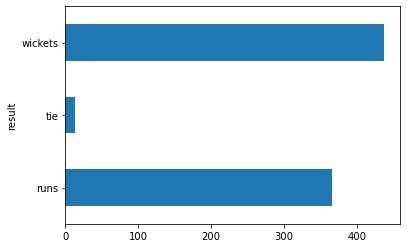

In [245]:
df.groupby('result')['times'].sum().plot(kind='barh')

***here what we understand that most of the matches are won on the wickets 

<AxesSubplot:xlabel='winner', ylabel='count'>

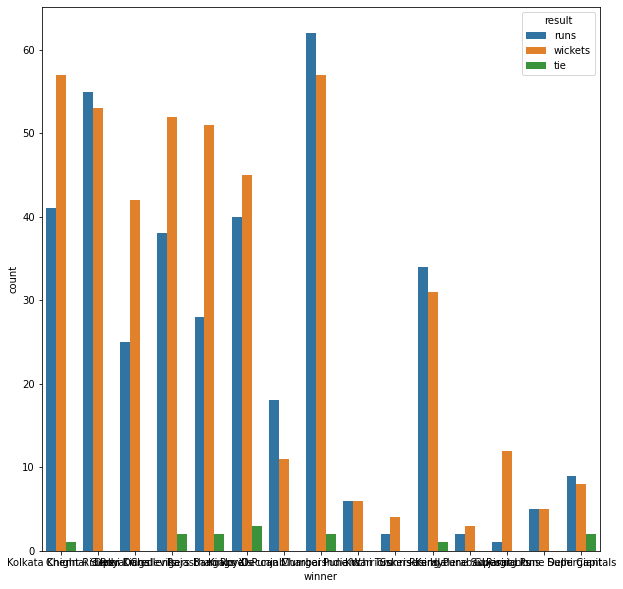

In [187]:
plt.figure(figsize=(10,10))
sns.countplot(data=data,x='winner',hue='result')

### USING PAIR PLOT TO SHOW THE RELATION

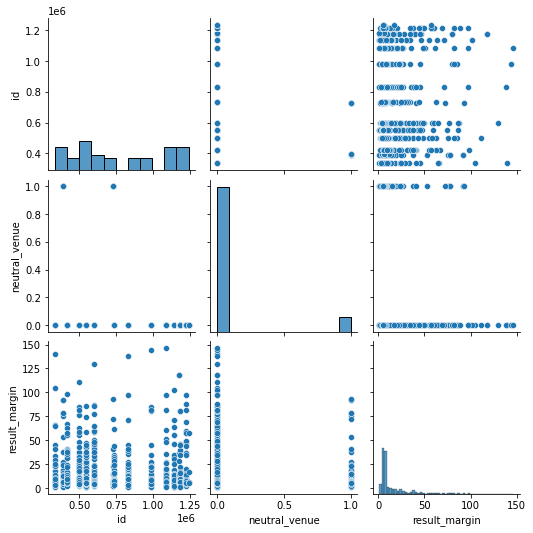

In [188]:
sns.pairplot(data)

### CONCLUSION

->From above analysis i have concluded highest award of 'player of the game' is received by AB Devillers and J Theron. 
->Mumbai Indians is the team,won maximum times in the Ipl History i.e almost 15% and least time chennai super kings ie.13.24%. 
->Most of the teams won,when they won the toss and choice to field 
->Match Result is declared mostly on the basis of runs
->less number of matches which are tied
->winning percentage with their venue/home town is less then 15%,the highest % of wins with respect to venue the team is Kolkata Knight Riders
->Outoff Total matches,these is the data on the basis of their result
runs       366
tie         13
wickets    437
->on the Toss decision
bat      320
field    496



### RESULT

->After my analysis the strategy of the team must be with respect to the toss,
 if they win toss and in case if they choose to field the chances of winning the match is more(60-70)%.
->When they will come to bat they should try to hold the wickets.
->Chances of winning with respect venue is very low,we'll not consider it.
->In case if they losses toss,then at the time of batting make runs as much as possible by holding wickets also 
